# Installing libraries - if not already installed 


In [12]:
""""!pip install pandas
!pip insall seaborn
!pip install scikit-learn
!pip install matplotlotlib
!pip install numpy"""

'"!pip install pandas\n!pip insall seaborn\n!pip install scikit-learn\n!pip install matplotlotlib\n!pip install numpy'


# Use Case - Predicting diabetes using Machine Learning

For this case study we are using the pima indians diabeters data set.


### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?


Credits: https://www.kaggle.com/uciml/pima-indians-diabetes-database


# Data Set Overview

### Features

1. preg: Number of times pregnant
2. plas: glucose concentration a 2 hours in an oral glucose tolerance test
3. pres blood pressure (mm Hg)
4. skin: skin fold thickness (mm)
5. test: serum insulin (mu U/ml)
6. mass: body mass index (weight in kg/(height in m)^2)
7. diab: Diabetes pedigree function
8. age: Age (years)


### Labels

class : variable (0 = No Diabetes, 1 = Diabetes)

In [13]:
#to manipulate, load and analyse data
import pandas as pd

data = pd.read_csv("D:/RnD/pima-indians-diabetes.csv", na_values = 0)
data["class "].fillna(0, inplace = True)

In [14]:
#count the missing values in our features 
pd.DataFrame(data.isna().sum()/data.shape[0] *100, columns =["Missing Value Percentage"])

,Missing Value Percentage
preg,14.453125
plas,0.651042
pres,4.557292
skin,29.557292
test,48.697917
mass,1.432292
pedi,0.000000
age,0.000000
class,0.000000


We have quite a lot of missing values in our dataset here and the feature "test" has the highest percentage of missing values. We can try different approaches here to handle for missing values

1.  Drop all rows containing missing values

2. Fill missing values with mean , median or mode.

We can do something enitirely different here but to keep it simple we will just drop all the rows with missing values.

In [15]:
#Dropping all rows containing missing values
data_drop_all = data.dropna()
print(data_drop_all.shape)

(336, 9)


Looking at the plot below it is evident that the data set we have here is quite imbalanced so once we implement models to predict if a patient has diabetes (class 1) or not (class 0) we cant just rely on accurracy as a performance metric for our model. We need to look at the precision, recall, f1-score of our model to ascertain if our model is good enough or not. More on that later.

# Lets do some plotting!

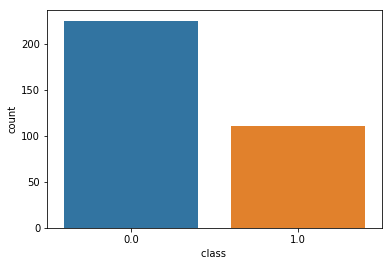

In [16]:
#visualizing the data
import seaborn as sns
sns.countplot(x = "class ", data = data_drop_all)

# Heatmap of Correlation Matrix

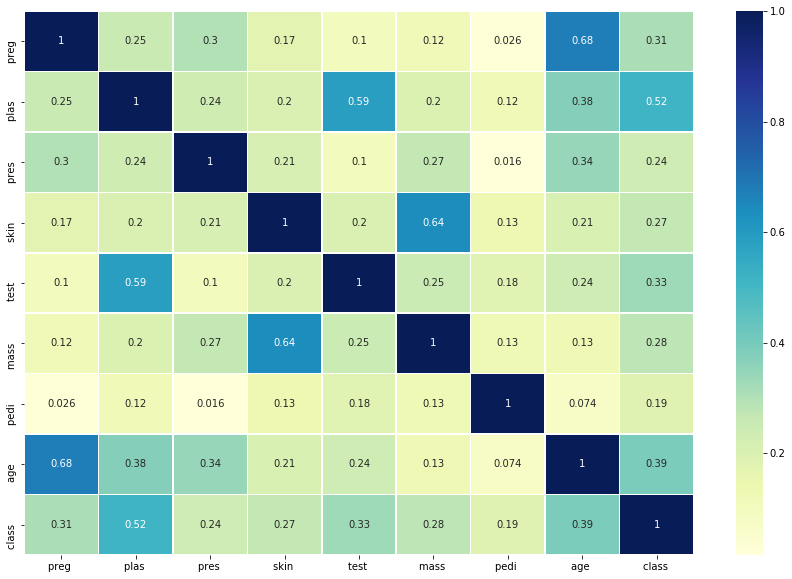

In [17]:
# using matplotlib to define the size of the figure
import matplotlib.pyplot as plt

# Sample figsize in inches
fig, ax = plt.subplots(figsize=(15,10))  # Sample figsize in inches

#heatmap of correlation matrix
sns.heatmap(data_drop_all.corr(), annot=True, linewidths=.5, ax=ax, cmap ="YlGnBu")

In [18]:
X = data_drop_all.iloc[:,0:-1] #features
y = data_drop_all.iloc[:,-1] #labels

#fixing the random seed for reproducibility
import numpy as np
np.random.seed(91415) 

#split data into training and testing set using sklearn library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(268, 8)
(68, 8)
(268,)
(68,)


# What do we do now?

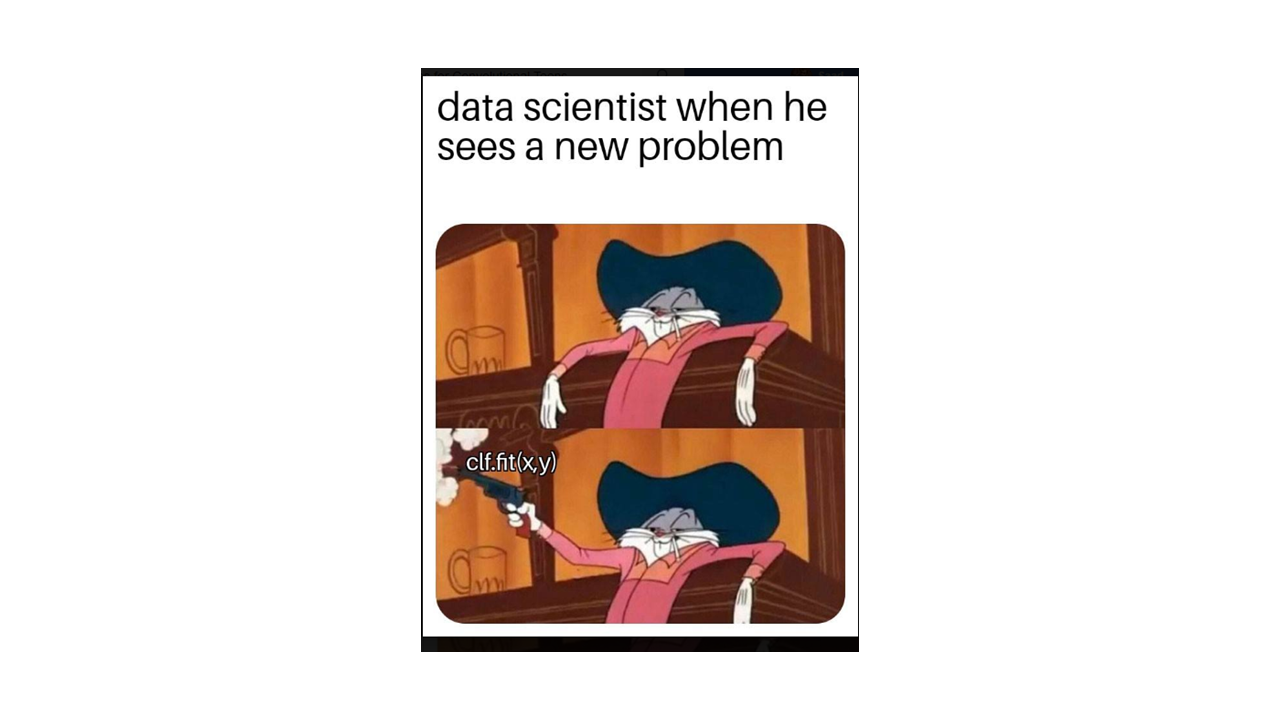

In [19]:
#lets import  our classification model
from sklearn.ensemble import RandomForestClassifier


#create a model object
model = RandomForestClassifier()

#fit the training data to the model
model.fit(X_train, y_train)


#predict
y_pred = model.predict(X_test)

#predict probabilities for each class
y_pred_prob = model.predict_proba(X_test)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Classification model evaluation metrics

As mentioned before when dealing imbalanced classification data we need to look at the performance of our model through different metrics.

Lets start with the confusion matrix first. In simple terms confusion matrix explains/describes the performance of a classification model. We can also calculate precision and recall from the confusions matrix. The following figure will further explain what a confusion matrix is and what other information can be extracted out from it.

### for both precision and recall our postive class here is class[1] indicating the presence of diabetes in the patient and class [0] is negative class indicating no diabetes.

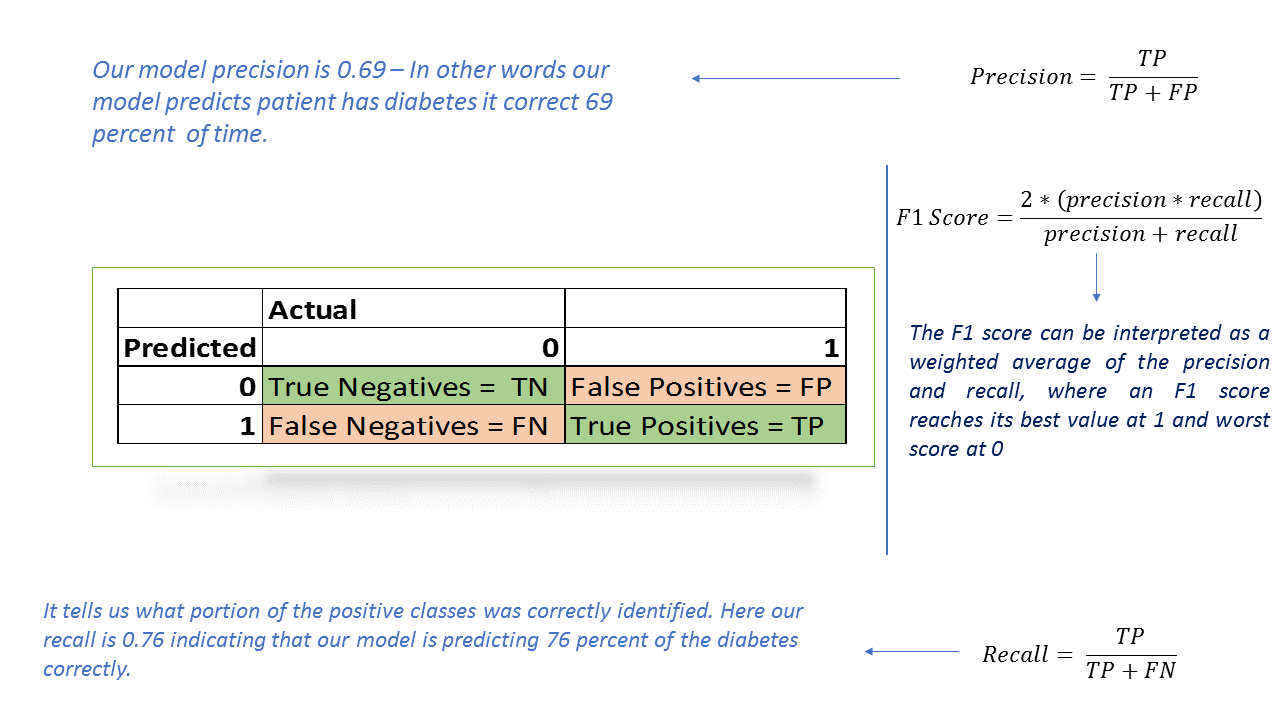

In [20]:
#evaluating model performance
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score, accuracy_score

conf_mat = confusion_matrix(y_test, y_pred)
print("The confusion matrix for the model is \n", conf_mat)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print("Precsion score:", precision)
print("Recall score:", recall)
print("f1 score:", f1score)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model is: ",accuracy)


The confusion matrix for the model is 
 [[40  7]
 [ 5 16]]
Precsion score: 0.6956521739130435
Recall score: 0.7619047619047619
f1 score: 0.7272727272727272
Accuracy of the model is:  0.8235294117647058


# Model Interpretability

So once we have got our model we cant just sit back and say we have got a good model we need to also look at the intertpretation of the model features that is we need to know what features are impacting the data and if it  makes sense or not.

#  Shap Values

Although here we are using shap values in the context of machine learning but its has its foundations in cooperative game theory. It was proposed by Lloyed shapely in 1953 and recently this solution concept is being used in understanding the results of machine learning model. Shap values basically give us how much each feature contributed to our final prediction on average.


"In summary, Shapley values calculate the importance of a feature by comparing what a model predicts with and without the feature. However, since the order in which a model sees features can affect its predictions, this is done in every possible order, so that the features are fairly compared." 
https://medium.com/@gabrieltseng/interpreting-complex-models-with-shap-values-1c187db6ec83

In [21]:
import shap 
shap.initjs()


explainer = shap.TreeExplainer(model)
shap_values  = explainer.shap_values(X_test)

#shap.force_plot(explainer.expected_value[1], shap_values[0][0,:], X_test.iloc[0,:], plot_cmap=["#008000", "#FF0000"])

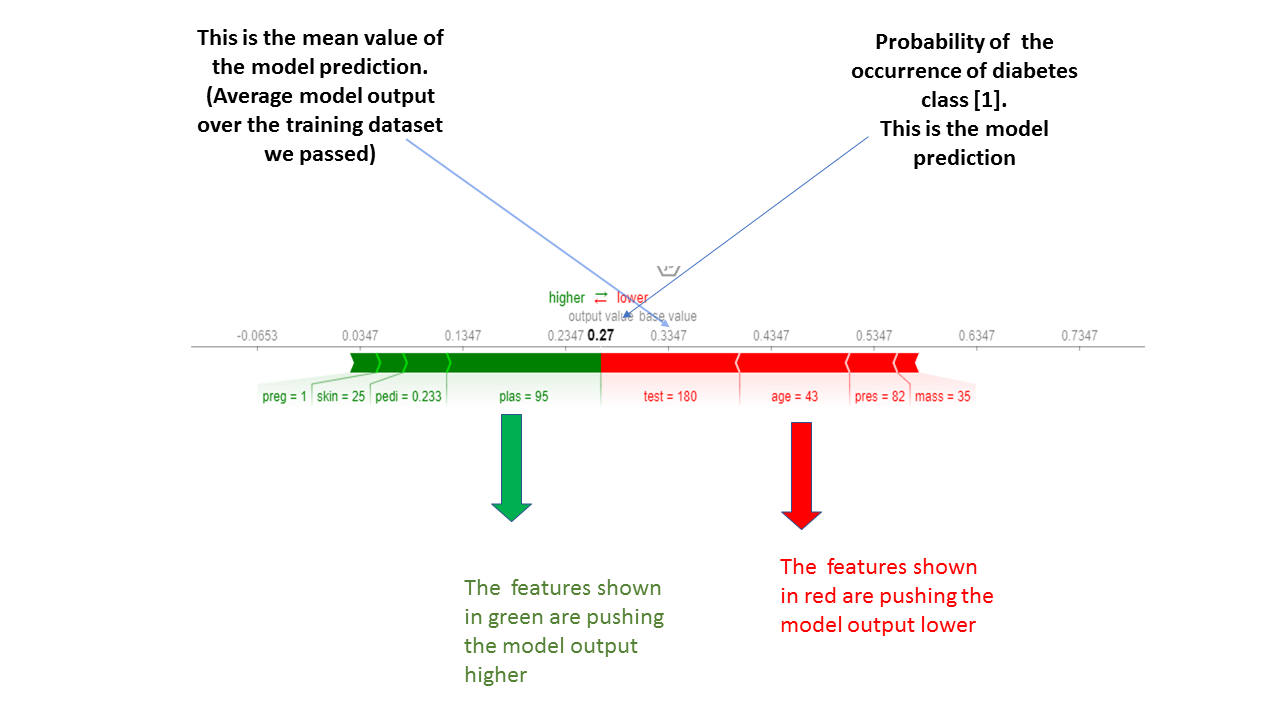